In [5]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = ElasticNet(l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.0442308546929169


In [6]:
grid = {'alpha': [0.1, 0.5, 1], 'l1_ratio': [0, 0.1, 0.2, 0.5, 0.7, 0.9, 1]}
gs = GridSearchCV(lr, grid, cv=5, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/home/ivanyingx/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.338e+03, tolerance: 1.755e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/ivanyingx/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.377e+03, tolerance: 1.779e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

-0.56926948986543
{'alpha': 0.1, 'l1_ratio': 0}


/home/ivanyingx/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.436e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [10]:
best_en = gs.best_estimator_

In [12]:
best_en.intercept_
best_en.coef_

array([ 0.74396329,  0.15786503, -0.08770009,  0.10742237,  0.00916929,
       -0.03885439, -0.40695521, -0.36937338])

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.9400120547815177


In [21]:
w = lasso.coef_[0]
b = lasso.intercept_

In [15]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [17]:
new_X = X['MedInc']

In [18]:
new_X

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

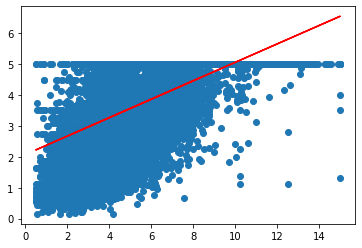

In [22]:
import matplotlib.pyplot as plt
plt.plot(new_X, y, 'o')
plt.plot(new_X, w*new_X + b, 'r')

In [27]:
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier()
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9527777777777777


In [ ]:
grid = {'loss': ['hinge', 'modified_huber', 'squared_hinge'], 
        'penalty': ['l2', 'l1', 'elasticnet'], 
        'alpha': [0.001, 0.01, 0.1, 1, 10], 
        'l1_ratio': [0, 0.1, 0.5, 0.9, 1]}

gs = GridSearchCV(sgd, grid, cv=5, scoring='accuracy', verbose=2)
gs.fit(X_train, y_train)

In [31]:
gs.best_estimator_

SGDClassifier(alpha=0.001, l1_ratio=0.5, penalty='elasticnet')

In [32]:
gs.best_score_

0.9471036585365853